<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/WeightDecay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


In [4]:
model = SimpleModel().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

In [7]:
decay_values = [0, 1e-4, 1e-2]
results = []

# Define missing variables for demonstration purposes
num_epochs = 5
dummy_data = torch.randn(100, 784) # Example: 100 samples, 784 features (for SimpleModel input)
dummy_labels = torch.randint(0, 10, (100,)) # Example: 100 labels for 10 classes
dataset = torch.utils.data.TensorDataset(dummy_data, dummy_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16)
criterion = nn.CrossEntropyLoss()

for decay in decay_values:
    model = SimpleModel().to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=decay)

    # Sample training loop
    for epoch in range(num_epochs):
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    results.append((decay, loss.item()))
    print(f"Decay: {decay}, Final Loss: {loss.item()}")

print("Experiment Results:", results)

Decay: 0, Final Loss: 2.1401147842407227
Decay: 0.0001, Final Loss: 2.1121251583099365
Decay: 0.01, Final Loss: 2.1620538234710693
Experiment Results: [(0, 2.1401147842407227), (0.0001, 2.1121251583099365), (0.01, 2.1620538234710693)]


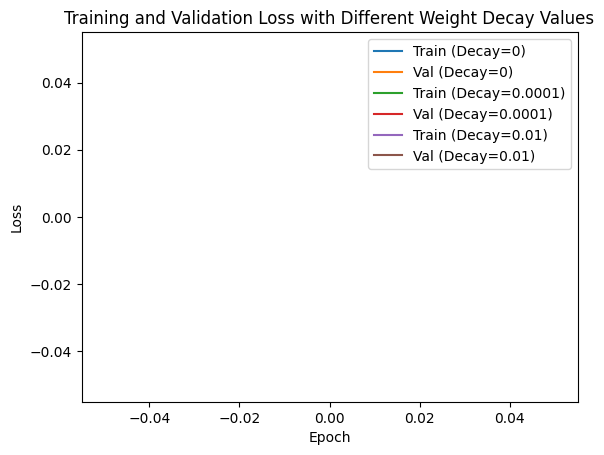

In [8]:
import matplotlib.pyplot as plt

# Assume training and validation losses are stored in these lists
training_losses = {
    0: [],    # weight decay 0
    1e-4: [], # weight decay 1e-4
    1e-2: []  # weight decay 1e-2
}
validation_losses = {
    0: [],
    1e-4: [],
    1e-2: []
}

# Plotting the results
for decay in training_losses:
    plt.plot(training_losses[decay], label=f"Train (Decay={decay})")
    plt.plot(validation_losses[decay], label=f"Val (Decay={decay})")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss with Different Weight Decay Values")
plt.legend()
plt.show()

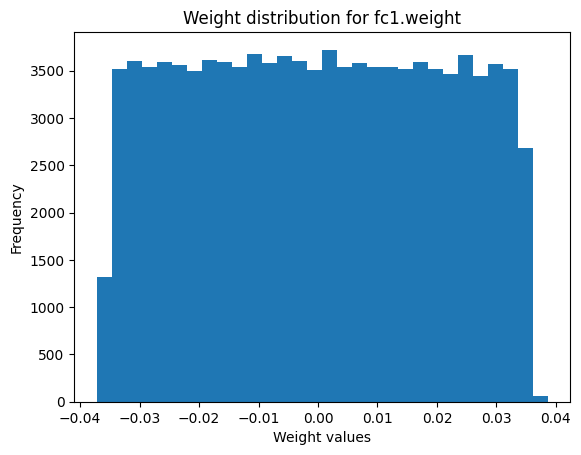

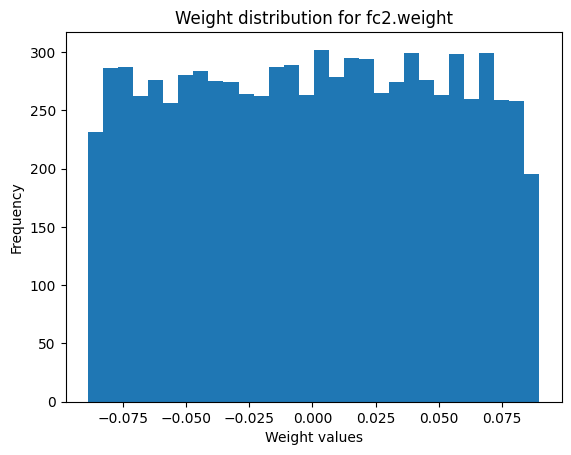

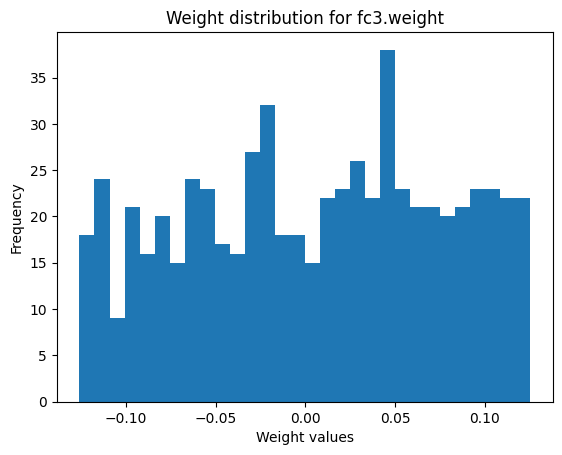

In [9]:
for name, param in model.named_parameters():
    if 'weight' in name:
        plt.hist(param.detach().cpu().numpy().flatten(), bins=30)
        plt.title(f'Weight distribution for {name}')
        plt.xlabel("Weight values")
        plt.ylabel("Frequency")
        plt.show()

In [11]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# In your training loop:
for epoch in range(num_epochs):
    for batch in dataloader:
        optimizer.zero_grad()
        outputs = model(batch[0].to(device))
        loss = criterion(outputs, batch[1].to(device))
        loss.backward()
        optimizer.step()

    # Step the scheduler
    scheduler.step()

In [12]:
optimizer = optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-4)